# Linear Regression with One variable

## warmUpExcercise

## Linear regression with one variable

## Gradient Descent


In [4]:
# import libraries and load data for our model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d # for plotting 3d axes

pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
pd.set_option("display.max_seq_items", None)

# %config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## warmUpExcersice

In [5]:
def warmUpExercise():
    return(np.identity(5))

In [6]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Linear Regression with one variable

In [7]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

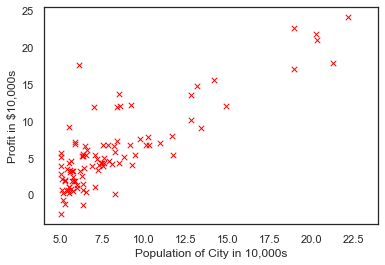

In [8]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24) # x limit
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s");

## Gradient Descent

In [12]:
def computeCost(X, y, theta=[[0], [0]]):
    m = y.size
    J=0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return J

In [11]:
computeCost(X,y)

NameError: name 'j' is not defined